<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/SVM%20and%20LR/Mini-Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contributors
* Tadd Backus
* Kendall Scott
* Austin Webb
* Milan Patel


In [18]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [19]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier

pd.set_option('display.max_columns',None)

In [20]:
forest_cover_type = pd.read_csv('covtype.csv')
forest_cover_type.head()
# Creating a new dataset that only contains the most common cover types
#updated to all
# Renaming wilderness areas
forestDF = forest_cover_type
forestDF.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forestDF.head()

forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()
# Coding Lodgepole Pine as 1 and Spruce/Fir as 0

count             581012
unique                 7
top       Lodgepole Pine
freq              283301
Name: Cover_Type, dtype: object

In [21]:
# Lodgepole Pine = 1 | Spruce/Fir = 0
forestDF['treeType'] = forestDF.Cover_Type
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']


## Create Models
For our models, we decided to predict Spruce/Fir.

After comparing the results, we will make a recommendation for which model to implement in order to predict Cover Type.


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. 
Assess how well each model performs (use 80/20 training/testing split for your data). 
Adjust parameters of the models to make them more accurate. 
If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

# Logistic Regression

In [22]:
forestFullDF = forestDF.copy()

In [35]:
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

In [29]:
#Creating cross validation object
num_cv_iter = 10
num_instances = len(Y)
cv_Log = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)

In [25]:
# Creating logistic regression object
lr_clf = LogisticRegression(penalty = 'l2',
                            C = 1.0,
                            class_weight = None)

In [30]:
# Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_Log.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))

    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.6195106838894004
Confusion Matrix 
 [[ 1435     0     0    90     0  5507   164]
 [  108     0     0     0     0   437     0]
 [    8     0     0     0     0  1704   177]
 [  313     0     0    13     0  2996   200]
 [    0     0     0     0     7   498  3607]
 [  345     0     0     7    41 43987 12265]
 [   56     0     0     0   116 15575 26547]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.6201130779756117
Confusion Matrix 
 [[ 1370     0     0    93     0  5517   115]
 [   76     0     0     3     0   450     0]
 [   11     0     0     0     1  1708   198]
 [  332     0     0    22     0  3056   156]
 [    0     0     0     0     0   456  3636]
 [  405     0     0    14    17 44083 12237]
 [   83     0     0     8    49 15523 26584]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.6198979372305362
Confusion Matrix 
 [[ 1604     0     0    25     0  5377   141]
 [   67     0     0     0     0   507     0]
 [    6     0     0     0     0  1676   229]
 [  537     0     0     8     0  2774   199]
 [    0     0     0     0     0   477  3635]
 [  559     0     0     4    22 43225 12826]
 [  139     0     0     4    59 14906 27197]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.6207068664320198
Confusion Matrix 
 [[ 1651     0     0   167     1  5192   128]
 [  130     0     0     1     0   415     0]
 [   12     0     0     0     2  1676   209]
 [  425     0     0    42     0  2810   184]
 [    0     0     0     0     3   440  3585]
 [  373     0     0    39    28 43813 12606]
 [   62     0     0    15    89 15486 26619]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.620810133989656
Confusion Matrix 
 [[ 1576     0     0    27     0  5453   131]
 [   92     0     0     0     0   481     0]
 [   15     0     0     0     0  1630   200]
 [  424     0     0     3     0  2952   160]
 [    0     0     0     0     0   440  3594]
 [  485     0     0     4     6 43774 12334]
 [   94     0     0     4    36 15501 26787]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.619304148774128
Confusion Matrix 
 [[ 1663     0     0    97     0  5311   141]
 [  101     0     0     1     0   468     0]
 [   35     0     0     0     4  1648   236]
 [  428     0     0    32     0  2869   197]
 [   16     0     0     0     0   482  3625]
 [  614     0     0    27    14 43149 12838]
 [  131     0     0    17    24 14914 27121]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.6199237541199453
Confusion Matrix 
 [[ 1663     0     0     6     0  5347   158]
 [   79     0     0     0     0   442     0]
 [   35     0     0     0     0  1618   211]
 [  378     0     0     0     0  2905   190]
 [    8     0     0     0     0   534  3524]
 [  448     0     0     0     0 44529 11771]
 [  103     0     0     0     0 16409 25845]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.6204573031677323
Confusion Matrix 
 [[ 1187     0     0    60     0  5737   150]
 [   60     0     0     0     0   493     0]
 [    6     0     0     0     1  1712   201]
 [  312     0     0    21     0  2907   171]
 [    0     0     0     0     0   494  3528]
 [  297     0     0    15     9 44419 12020]
 [   74     0     0     6    26 15825 26472]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.6213178661480341
Confusion Matrix 
 [[ 1506     0     0   160     0  5403   114]
 [  121     0     0     0     0   424     0]
 [   26     0     0     0     4  1709   187]
 [  280     0     0    13     0  2881   170]
 [    0     0     0     0     6   482  3644]
 [  379     0     0    13    24 43185 12937]
 [   72     0     0     2    66 14906 27489]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 9 ****
Accuracy 0.617737924149979
Confusion Matrix 
 [[ 1146     0     0   112     1  5793   126]
 [   97     0     0     0     0   452     0]
 [    8     0     0     0     1  1684   181]
 [  214     0     0    14     0  3044   181]
 [    0     0     0     0    10   413  3665]
 [  252     0     0     3    67 43696 12665]
 [   43     0     0     2   121 15295 26917]]


After the logistic regression model was run ten times, the accuracy score appeared to remain near 61%. This shows us that the different train/test splits seem to be fair in their distributions. We do anticipate a change in accuracy (an increase) as we attempt to adjust some parameters and implement other measures. 

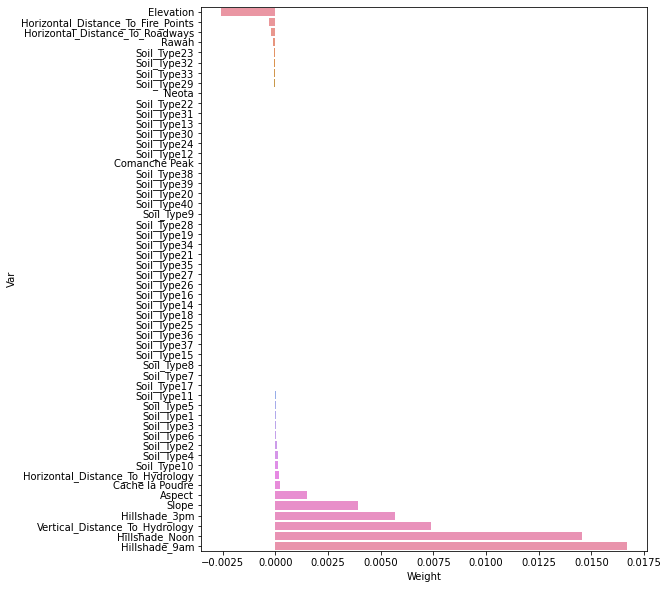

In [32]:
logWeights = pd.Series(lr_clf.coef_[0], index = forestDF.columns)
logWeights = pd.DataFrame({'Var':logWeights.index, 'Weight':logWeights.values})
logWeights = logWeights.sort_values('Weight')
plt.figure(figsize=(8, 10))
sns.barplot(x='Weight', y = 'Var', data = logWeights)

We decided to leverage Random Forest to eliminate some of the variables included in the model, to see if there is an increase in performance in a simpler model.

In [39]:
Y_rf=pd.Categorical(Y)

In [41]:
# Feature Importance Graph
# Takes about five minutes
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(X, Y)

ValueError: ignored

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(forestDF.columns.values[sort], rf.feature_importances_[sort])
plt.xlabel('Feature Importance')
plt.axis([0, 0.35, 34, 52])
plt.show()

In [ ]:
forestDF.columns

Based on the importance output, we decided to build a simplified model on:

*   Elevation
*   Horizontal Distance to Fire Points
*   Soil Type: 32, 4, 2, 23, 29, 33, 31, 22
*   Horizontal Distance to Roadways
*   Wilderness Area: Comanche Peak, Rawah
*   Horizontal Distance To Hydrology
*   Hillshade noon
*   Aspect
*   Slope




In [42]:
forestDF_new = pd.DataFrame().assign(
                treeType=Y, 
                Elevation=forestDF['Elevation'], 
                Horizontal_Distance_To_Fire_Points=forestDF['Horizontal_Distance_To_Fire_Points'],
                Soil_Type32=forestDF['Soil_Type32'],
                Soil_Type4=forestDF['Soil_Type4'],
                Soil_Type2=forestDF['Soil_Type2'],
                Soil_Type23=forestDF['Soil_Type23'],
                Soil_Type29=forestDF['Soil_Type29'],
                Soil_Type33=forestDF['Soil_Type33'],
                Soil_Type31=forestDF['Soil_Type31'],
                Soil_Type22=forestDF['Soil_Type22'],
                Horizontal_Distance_To_Roadways=forestDF['Horizontal_Distance_To_Roadways'],
                Comanche_Peak=forestDF['Comanche Peak'], 
                Rawah=forestDF['Rawah'], 
                Horizontal_Distance_To_Hydrology=forestDF['Horizontal_Distance_To_Hydrology'],
                Hillshade_Noon=forestDF['Hillshade_Noon'],
                Aspect=forestDF['Aspect'],
                Slope=forestDF['Slope']
                                                      )


In [43]:
# Assign specific features to two different variables
if 'treeType' in forestDF:
    Y = forestDF_new['treeType'].values
    del forestDF_new['treeType']
    X = forestDF_new.values

In [44]:
# Re-creating logistic regression object
lr_clf_new = LogisticRegression(penalty = 'l2', C = 1.0, class_weight = None)

In [ ]:
#Running logistic regression on 10 random test/train splits with simplified model
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf_new.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf_new.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.6196483739662487
Confusion Matrix 
 [[ 1576     0     0    76     0  5418   112]
 [  150     0     0     0     0   388     0]
 [   23     0     0     0     0  1686   179]
 [  315     0     0     2     0  3030   168]
 [    0     0     0     0    17   495  3553]
 [  360     0     0     0    60 43841 12523]
 [   67     0     0     0   133 15462 26569]]


## Interpret Feature Importance 30

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

## Looking at weights of the model

In [ ]:
weights = lr_clf_new.coef_.T
varNames = forestDF_new.columns
for coef, name in zip(weights, varNames):
    print(name, 'has weight of', coef[0])

### Scaling the weights for interpretability

In [ ]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty = 'l2', C = 0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices], y_hatS)
conf = mt.confusion_matrix(Y[test_indices], y_hatS)
print('accuracy:', acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T, forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

### Plotting weights (scaled weights)

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0], index = forestDF.columns)
weights.plot(kind = 'bar')
plt.show()

The weights from the logistic regression model help us identify the importance of the various features. Having so many differnet features, it can be nice to see which ones impact the classification more so than others. This way, we can use those of utomst importance to create a better/more accurate model. 

We can see from the graph these weights for the various features quite nicely. The graph shows us that 'Elevation' has the largest absolute value. This allows us to assume that it plays the largest role in classification, in regard to all the other features in this dataset. Cache la Poudre is the next highest value. 

We believe that certain features have higher weights due to their immediate connection with the clasification. The Spruce/Fir trees grow best in certain conditions; some of these conditions are listed in the features. We believe that elevation is a key driver in identifying whether a tree is a Spruce/Fir. Similarly, we believe that other features directly connect to Spruce/Fir - like soil type.   

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

In [ ]:
# Creating Cross Validation Object - SVM
cv_CGD = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2)

In [ ]:
#Creating SVM using linear SGD due to large amount of data
regularize_const = 0.1
iterations = 10

svm_sgd = SGDClassifier(alpha=regularize_const,
                       fit_intercept = True,
                       l1_ratio = 0.0,
                       learning_rate = 'optimal',
                       loss = 'hinge',
                       max_iter = iterations,
                       n_jobs = -1,
                       penalty = 'l2')

In [ ]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]), Y[train_idx])
    y_hatSVM = svm_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy', mt.accuracy_score(Y[test_idx], y_hatSVM))
    print('Confusion Matrix \n', mt.confusion_matrix(Y[test_idx], y_hatSVM))

In [ ]:
SVMWeights = pd.Series(svm_sgd.coef_[0], index = forestDF.columns)
SVMWeights = pd.DataFrame({'Var':SVMWeights.index, 'Weight':SVMWeights.values})
SVMWeights = SVMWeights.sort_values('Weight')
plt.figure(figsize = (8, 10))
sns.barplot(x = 'Weight', y = 'Var', data = SVMWeights)

In [ ]:
# Creating SVM using logistic SGD due to large amount of data
log_sgd = SGDClassifier(alpha = regularize_const,
                       fit_intercept = True,
                       l1_ratio = 0.0,
                       learning_rate = 'optimal',
                       loss = 'log',
                       max_iter = iterations,
                       n_jobs = -1,
                       penalty = 'l2')

In [ ]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    log_sgd.fit(scl.fit_transform(X[train_idx]), Y[train_idx])
    y_hatSVM = log_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy', mt.accuracy_score(Y[test_idx], y_hatSVM))
    print('Confusion Matrix \n', mt.confusion_matrix(Y[test_idx], y_hatSVM))

In [ ]:
logSVMWeights = pd.Series(log_sgd.coef_[0],index = forestDF.columns)
logSVMWeights = pd.DataFrame({'Var':logSVMWeights.index, 'Weight':logSVMWeights.values})
logSVMWeights = logSVMWeights.sort_values('Weight')
plt.figure(figsize = (8, 10))
sns.barplot(x = 'Weight', y = 'Var', data = logSVMWeights)

In [ ]:
# Sub-sampling data and verifying still balanced
forestSubDF = forestFullDF.sample(10000)
forestSubDF.head()
# forestSubDF['treeType'].describe().transpose()
forestSubDF.groupby('treeType').count()

In [ ]:
# Creating and Running SVM model on smaller dataframe
if 'treeType' in forestSubDF:
    ySub = forestSubDF['treeType'].values
    del forestSubDF['treeType']
    xSub = forestSubDF.values

In [ ]:
num_cv_iter = 10
num_instances = len(Y)
cv_Log = ShuffleSplit(n_splits = num_cv_iter, test_size = 0.2)

In [ ]:
for train_indices, test_indices in cv_Log.split(xSub, ySub):
    X_train = xSub[train_indices]
    Y_train = ySub[train_indices]
    X_test = xSub[test_indices]
    Y_test = ySub[test_indices]
X_train_scaled = sclObj.transform(X_train)
X_test_scaled = sclObj.transform(X_test)

In [ ]:

svm_clf = SVC(C = 0.5,
             kernel = 'rbf',
             degree = 3,
             gamma = 'auto')

In [ ]:
# Results
svm_clf.fit(X_train_scaled,Y_train)
y_hatSVM = svm_clf.predict(X_test_scaled)
print('Accuracy', mt.accuracy_score(Y_test, y_hatSVM))
print('Confusion Matrix \n', mt.confusion_matrix(Y_test, y_hatSVM))

In [ ]:
# Support Vector shape:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_)

In [ ]:
forestTested = forestSubDF.iloc[train_indices]
forestSupport = forestTested.iloc[svm_clf.support_,:]
forestSupport['treeType'] = ySub[svm_clf.support_]
forestSubDF['treeType'] = ySub

In [ ]:
forestGroupSupport = forestSupport.groupby(['treeType'])
forestGroup = forestSubDF.groupby(['treeType'])

vars_to_plot = ['Elevation', 'Hillshade_Noon', 'Soil_Type22', 'Soil_Type12']

for v in vars_to_plot:
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    ax = forestGroupSupport[v].plot.kde()
    plt.legend(['Lodgepole Pine', 'Spruce/Fir'])
    plt.title(v + ' (Instances chosen as Support Vectors)')
    
    plt.subplot(1,2,2)
    ax = forestGroup[v].plot.kde()
    plt.legend(['Lodgepole Pine', 'Spruce/Fir'])
    plt.title(v + ' (Original)')


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. 
Assess how well each model performs (use 80/20 training/testing split for your data). 
Adjust parameters of the models to make them more accurate. 
If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

The SVM performed better than the logistic regression model. We see that the SVM gave us an accuracy score of 76%. This is a decent amount higher than the logistic score of 61%. We feel like there is still some room for improvement, but we are glad that we are seeing a higher accuracy score. 

## Interpret Support Vectors(10)

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

Looking at some of the support vectors that were chosen, we can see that they greatly affect the outcome of the calssification. The graphs above do a great job illustrating the change in accuracy when comparing the original and the Support Vector.  

## Model Advantages 10
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

The interpretability of Logistic Regression was fairly easy and understandable. This model also allowed for an easier way to see various accuracy scores for different train/test splits. 

The SVM model provided a better accuracy score, which shows its superiority to Logistic Regression in this particular case. And using certain plots, it is easier to visually see the outcome of the model. The SVM seemed to be slightly quicker than Logistic Regression as well. We can see that both models are decently quick to run, but the SVM is faster. 